In [ ]:
#Importing libraries
#!pip install gensim
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Section 01:- Paragraph Declared in one place

In [ ]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

## Section 02:- Tokenizing sentences

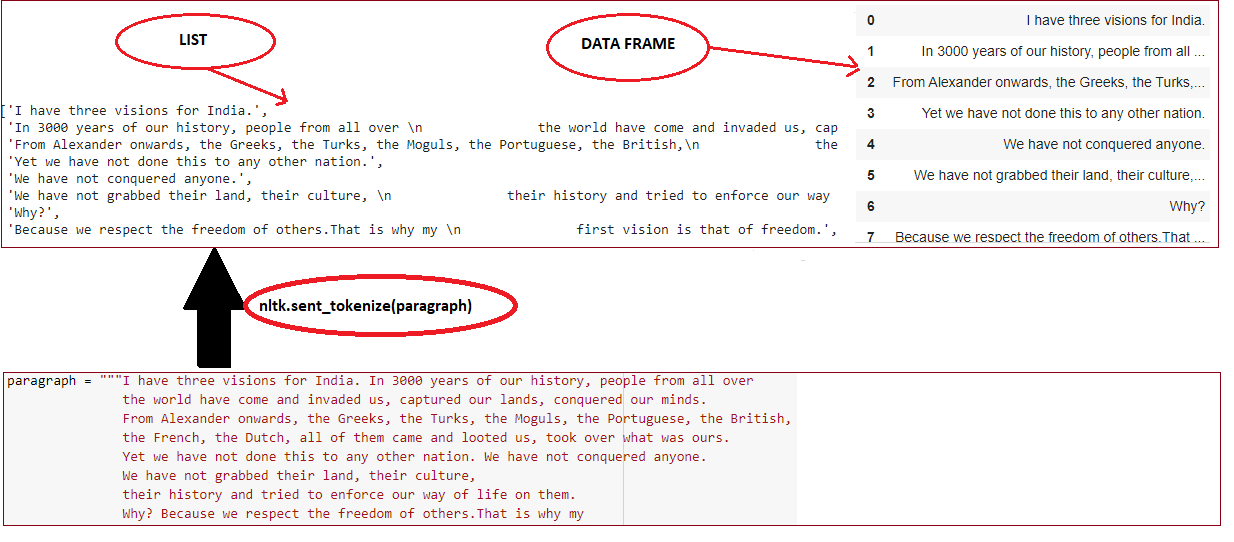

In [ ]:
# Tokenizing sentences
sentences = nltk.sent_tokenize(paragraph)
df = pd.DataFrame(sentences, columns=['sentences'])
#df

## Section 03:- Tokenizing words

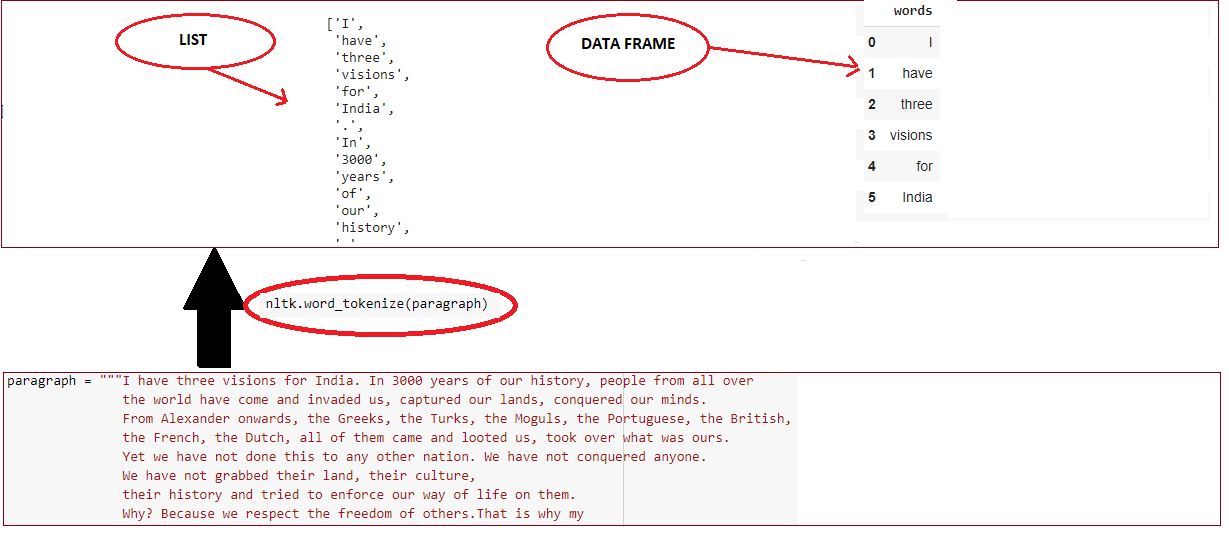

In [ ]:
# Tokenizing words
words = nltk.word_tokenize(paragraph)
#words
df = pd.DataFrame(words, columns=['words'])

## Section 04:- Stemming

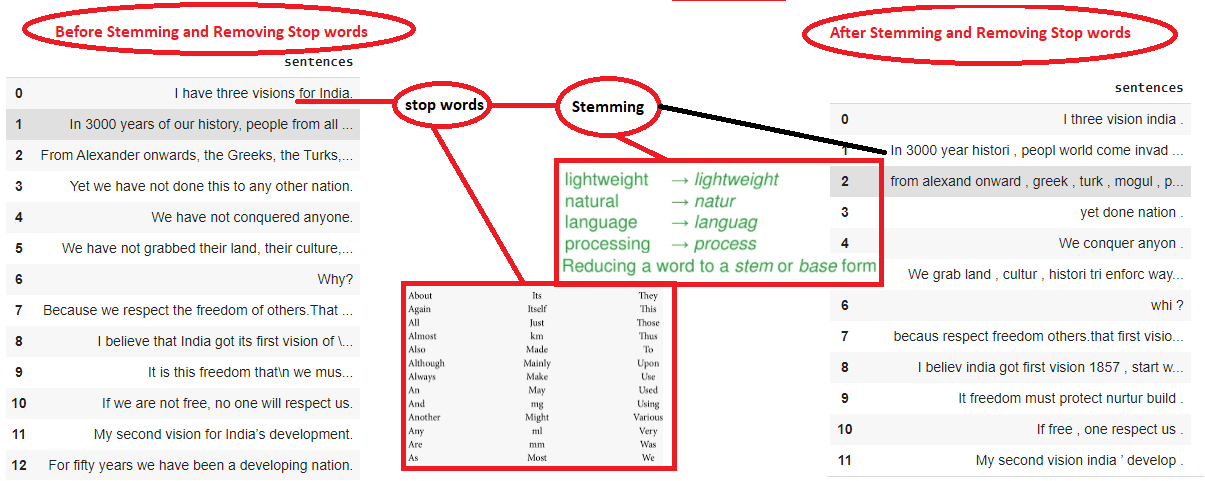

In [ ]:
# Tokenizing sentences
sentences = nltk.sent_tokenize(paragraph)
stemmer=PorterStemmer()

# Stemming
for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
  sentences[i]=' '.join(words)

sentences
df = pd.DataFrame(sentences, columns=['sentences'])
#sentences
#df

## Section 05:- Lemmatization

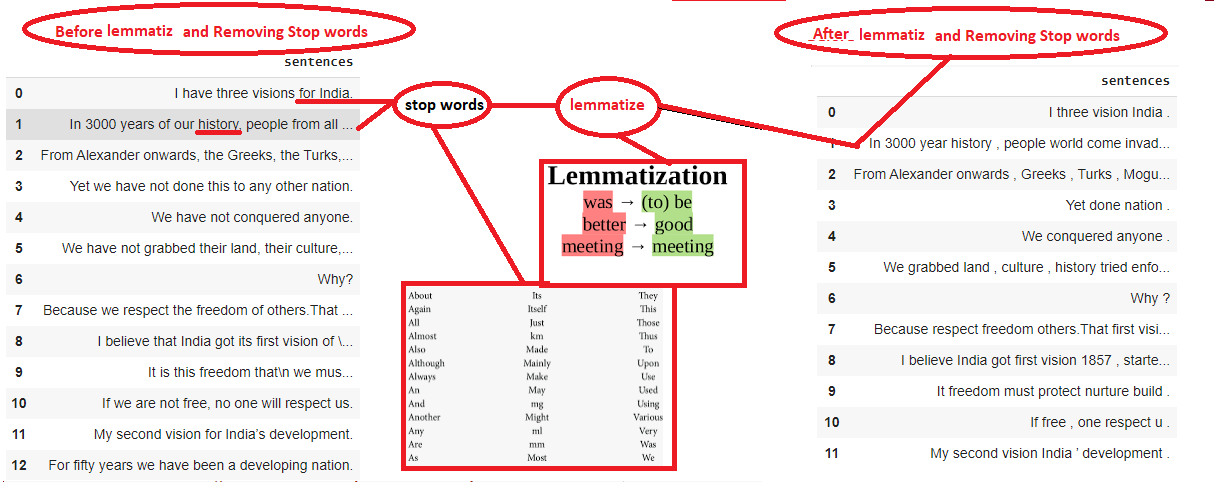

In [ ]:
# Tokenizing sentences
scentences = nltk.sent_tokenize(paragraph)
lemmatizer=WordNetLemmatizer()

for i in range(len(scentences)):
  words=nltk.word_tokenize(scentences[i])
  words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  sentences[i]=' '.join(words)

df = pd.DataFrame(sentences, columns=['sentences'])


## Section 05:- Bag of words (BOW)

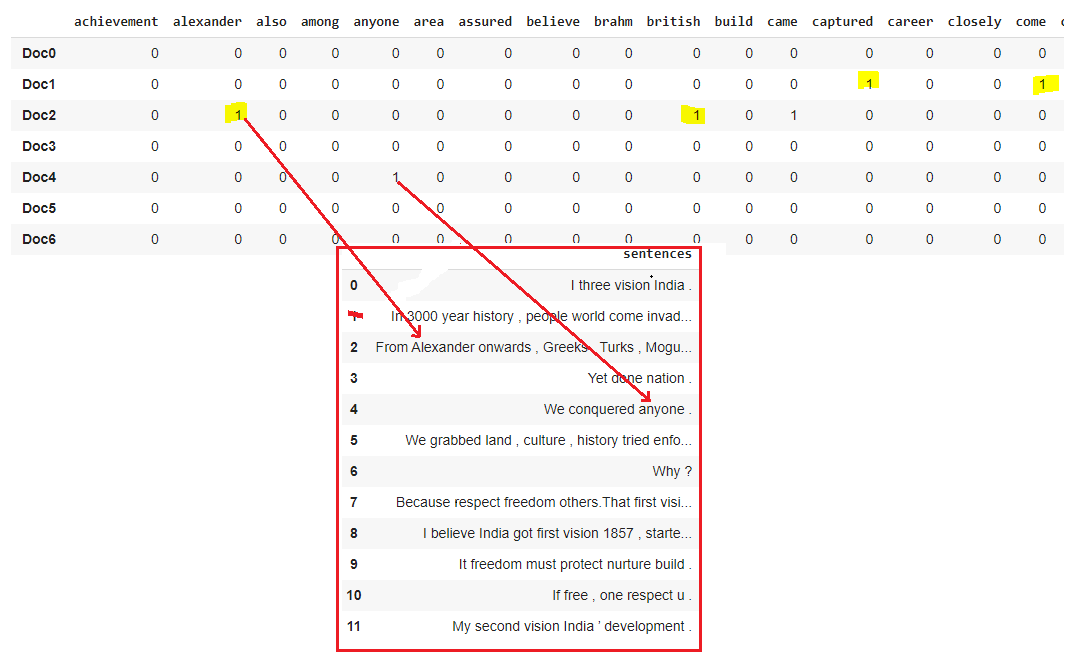

In [ ]:
ps=PorterStemmer()
#lemmatizer=WordNetLemmatizer()
wordnet=WordNetLemmatizer()
scentences=nltk.sent_tokenize(paragraph)
corpus=[]

for i in range(len(scentences)):
  # Removes all special characters and digits from the scentences
  review=re.sub('[^a-zA-Z]',' ',scentences[i])
  review=review.lower()
  review=review.split()
  review=[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

# To view corpus in list.
corpus

# To view corpus in dataframe.
df = pd.DataFrame(corpus, columns=['corpus'])

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm, index=doc_names,columns=feat_names)
    return(df)

cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()

tokens = cv.get_feature_names()
wm2df(X, tokens)
#X
#cv

,achievement,alexander,also,among,anyone,area,assured,believe,brahm,british,build,came,captured,career,closely,come,confidence,conquered,consider,culture,dept,developed,developing,development,dhawan,done,dr,dutch,economic,enforce,falling,father,fifty,first,fortune,four,free,freedom,french,gdp,...,percent,portuguese,poverty,power,prakash,professor,protect,rate,recognised,reliant,respect,sarabhai,satish,second,see,self,space,stand,started,strength,strong,succeeded,term,third,three,time,today,took,top,tried,turk,unless,vikram,vision,war,way,worked,world,year,yet
Doc0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
Doc2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Doc4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Doc5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
Doc6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Doc7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Doc8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
Doc9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Section 06:- TF-IDF

In [ ]:
ps=PorterStemmer()
#lemmatizer=WordNetLemmatizer()
wordnet=WordNetLemmatizer()
scentences=nltk.sent_tokenize(paragraph)
corpus=[]

for i in range(len(scentences)):
  # Removes all special characters and digits from the scentences
  review=re.sub('[^a-zA-Z]',' ',scentences[i])
  review=review.lower()
  review=review.split()
  review=[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

# To view corpus in list.
corpus

# To view corpus in dataframe.
df = pd.DataFrame(corpus, columns=['corpus'])
cv=TfidfVectorizer()
X=cv.fit_transform(corpus).toarray()
X


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25883507, 0.30512561,
        0.        ],
       [0.        , 0.28867513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
ps=PorterStemmer()
#lemmatizer=WordNetLemmatizer()
wordnet=WordNetLemmatizer()
scentences=nltk.sent_tokenize(paragraph)
corpus=[]

for i in range(len(scentences)):
  # Removes all special characters and digits from the scentences
  review=re.sub('[^a-zA-Z]',' ',scentences[i])
  review=review.lower()
  review=review.split()
  review=[wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

# creating TF-IDF modal

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline

model = Pipeline(
    [
        ("vectorizer", TfidfVectorizer())
    ]
)

cv=TfidfVectorizer()
x=model.fit_transform(corpus)
##.toarray()

vec = model.named_steps["vectorizer"]
features = vec.get_feature_names()
#features

x


<31x114 sparse matrix of type '<class 'numpy.float64'>'
	with 155 stored elements in Compressed Sparse Row format>

## Section 07:- Classifing the message SPAM or HAM Bog of words technique.

 Training Accuracy 0.9766659187794481


'Test Accuracy 0.9721973094170404'

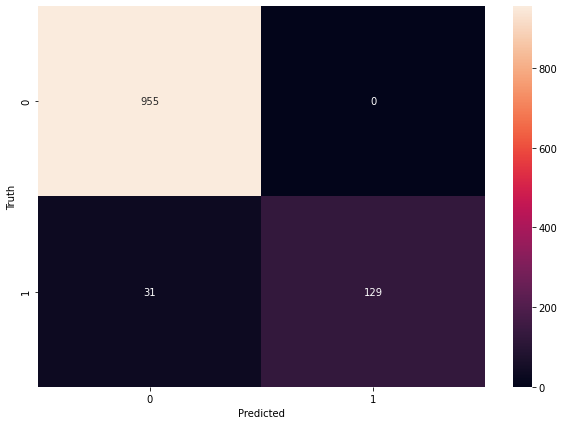

In [ ]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
corpus=[]
messages=pd.read_csv("/content/SMSSpamCollection",sep='\t',names=['label','message'])
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['message'][i]).lower().split()
    # Using lemmatization concept
    review=[ wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
#Defining bag of words
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(corpus).toarray()
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
spam_detect_model=MultinomialNB().fit(X_train,y_train)
y_predicted=spam_detect_model.predict(X_test)

#Plotting confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')


print(f' Training Accuracy {spam_detect_model.score(X_train,y_train)}')
f'Test Accuracy {spam_detect_model.score(X_test,y_test)}'

## Section 08:- Classifing the message SPAM or HAM using TFIDF Technique

 Training Accuracy 0.9847431007404084


'Test Accuracy 0.979372197309417'

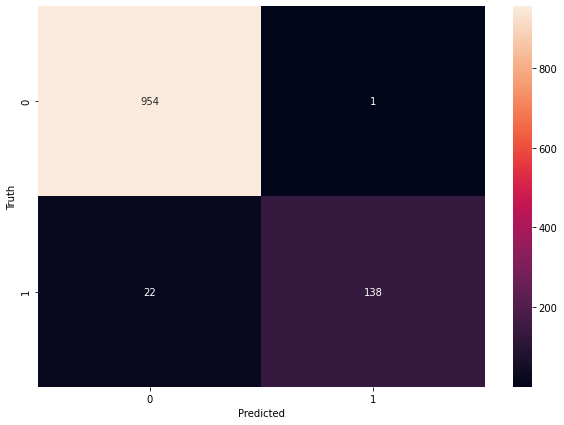

In [ ]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
corpus=[]
messages=pd.read_csv("/content/SMSSpamCollection",sep='\t',names=['label','message'])
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['message'][i]).lower().split()
    # Using lemmatization concept
    review=[ wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
#Defining bag of words
cv=TfidfVectorizer(max_features=2500)
X=cv.fit_transform(corpus).toarray()
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
spam_detect_model=MultinomialNB().fit(X_train,y_train)
y_predicted=spam_detect_model.predict(X_test)

#Plotting confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')


print(f' Training Accuracy {spam_detect_model.score(X_train,y_train)}')
f'Test Accuracy {spam_detect_model.score(X_test,y_test)}'

## Section 09:- Word2Vec

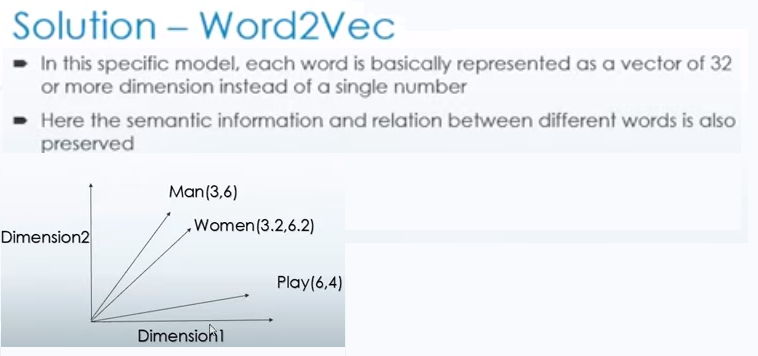

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


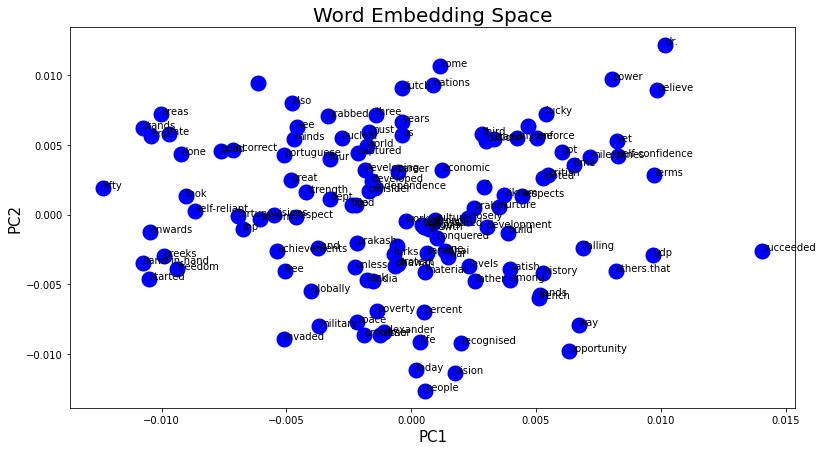

In [ ]:
text=re.sub(r'\[[0-9]*\]',' ',paragraph)
# Replaces all digit 
text=re.sub(r'\d',' ',text)
# Replace lot of white space with single white space.
text=re.sub(r'\s+',' ',text).lower()
scentences=nltk.sent_tokenize(text)

scentences=[nltk.word_tokenize(scentence) for scentence in scentences]
for i in range(0,len(scentences)):
  scentences[i]=[word for word in scentences[i] if word not in stopwords.words('english')]

# Training the wordvec model
model=Word2Vec(scentences,min_count=1)
words=list(model.wv.vocab)
vector=model.wv['war']
similar=model.wv.most_similar('come')

X=model[model.wv.vocab]
visualiseWord2Vec(X)

# In order to see words which are close to come are
similar


In [ ]:
####

def visualiseWord2Vec(X):
  df=pd.DataFrame(X)
  X_corr=df.corr()

  #Computing eigen values and eigen vectors
  values,vectors=np.linalg.eig(X_corr)

  #Sorting the eigen vectors coresponding to eigen values in descending order
  args = (-values).argsort()
  values = vectors[args]
  vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
  new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
  neww_X=np.dot(X,new_vectors)
  import matplotlib.pyplot as plt
  plt.figure(figsize=(13,7))
  plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
  plt.xlabel("PC1",size=15)
  plt.ylabel("PC2",size=15)
  plt.title("Word Embedding Space",size=20)
  vocab=list(model.wv.vocab)
  for i, word in enumerate(vocab):
      plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))


## Section 10:- Stock Sentiment Analysis

accuracy of Test data is 0.8518518518518519
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       186
           1       0.79      0.97      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



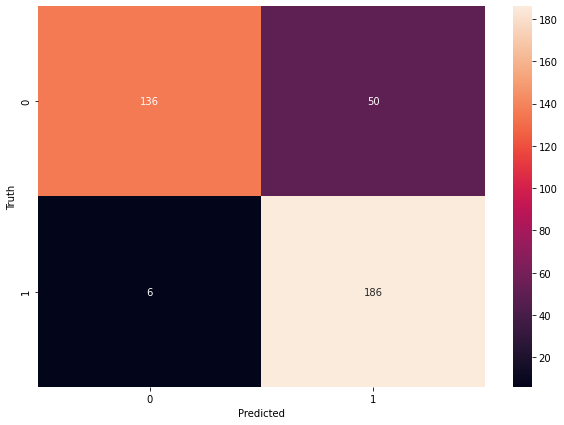

In [ ]:
df=pd.read_csv('/content/Data.csv',encoding = "ISO-8859-1")
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

#Removing the punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

# Renaming column names for ease of acess
new_index=[str(i) for i in range(25)]
data.columns=new_index

for index in new_index:
    data[index]=data[index].str.lower()

headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

#Plotting confusion Matrix
cm = confusion_matrix(test['Label'], predictions)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

score=accuracy_score(test['Label'],predictions)
print("accuracy of Test data is",score)
report=classification_report(test['Label'],predictions)
print(report)

## Section 11:- Fake News Classifications

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from google.colab import files

def twenty_newsgroup_to_csv():
    newsgroups_train = fetch_20newsgroups(subset='train')

    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']    

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out['date'] = pd.to_datetime('now')
    #out.to_csv('20_newsgroup.csv')
    files.download("20_newsgroup.csv")
    print(targets)

twenty_newsgroup_to_csv()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                       title
0                alt.atheism
1              comp.graphics
2    comp.os.ms-windows.misc
3   comp.sys.ibm.pc.hardware
4      comp.sys.mac.hardware
5             comp.windows.x
6               misc.forsale
7                  rec.autos
8            rec.motorcycles
9         rec.sport.baseball
10          rec.sport.hockey
11                 sci.crypt
12           sci.electronics
13                   sci.med
14                 sci.space
15    soc.religion.christian
16        talk.politics.guns
17     talk.politics.mideast
18        talk.politics.misc
19        talk.religion.misc
